# Iris dataset visualization

## Description:  
[Iris_dataset_exploritory_data_analysis_example](http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html#:~:text=The%20Iris%20Dataset%20contains%20four,model%20to%20classify%20the%20species.)  
Description is taken from the link above:   
 
The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species. The dataset is often used in data mining, classification and clustering examples and to test algorithms.

In [46]:
# imports:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from matplotlib import pyplot as plt

import pandas as pd

In [9]:
# load iris dataset:
iris_dataset = datasets.load_iris()
features = iris_dataset.data
target = iris_dataset.target
features_names = iris_dataset.feature_names
target_names = iris_dataset.target_names

In [17]:
features_df = pd.DataFrame(features, columns=features_names)
target_df = pd.DataFrame(target, columns=['Iris species'])

for visualization, join classes names for convenience:

In [25]:
classes_names = pd.DataFrame(target_names, columns=['Iris type'])
classes_names['class_id'] = [0,1,2]

# join classes_names:
target_df = pd.merge(target_df, classes_names, how='left', left_on='Iris species', right_on='class_id')
target_df = target_df.drop(columns=['Iris species', 'class_id'])

combine features with classes names for visualization:

In [34]:
data = pd.merge(features_df, target_df, left_index=True, right_index=True) # merge by index

In [35]:
# save to .csv file for analysis:
data.to_csv('./iris_data.csv', sep=';')

[link to Tableau public Dashboard](https://public.tableau.com/app/profile/aleksei5255/viz/Iris_Dataset_16608892902000/Irisdataset)

# Visualization of Decision Tree Classification

In [36]:
X = iris_dataset.data
y = iris_dataset.target

In [42]:
# split data into train and test datasets:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train model:
dtc = DecisionTreeClassifier(random_state=0)
dtc_model = dtc.fit(x_train, y_train)

# make predictions and calculate accuracy:
dtc_predictions = dtc_model.predict(x_test)
dtc_accuracy = accuracy_score(dtc_predictions, y_test)
print(f'accuracy of dtc = {round(dtc_accuracy * 100, 2)} %')

accuracy of dtc = 100.0 %


Accuracy of prediction is 100% which is very high, let's now visualize the results to see, how algorithm makes it's predictions

[Text(0.5, 0.9166666666666666, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = virginica'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = virginica'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = virginica'),
 Text(0.384615384

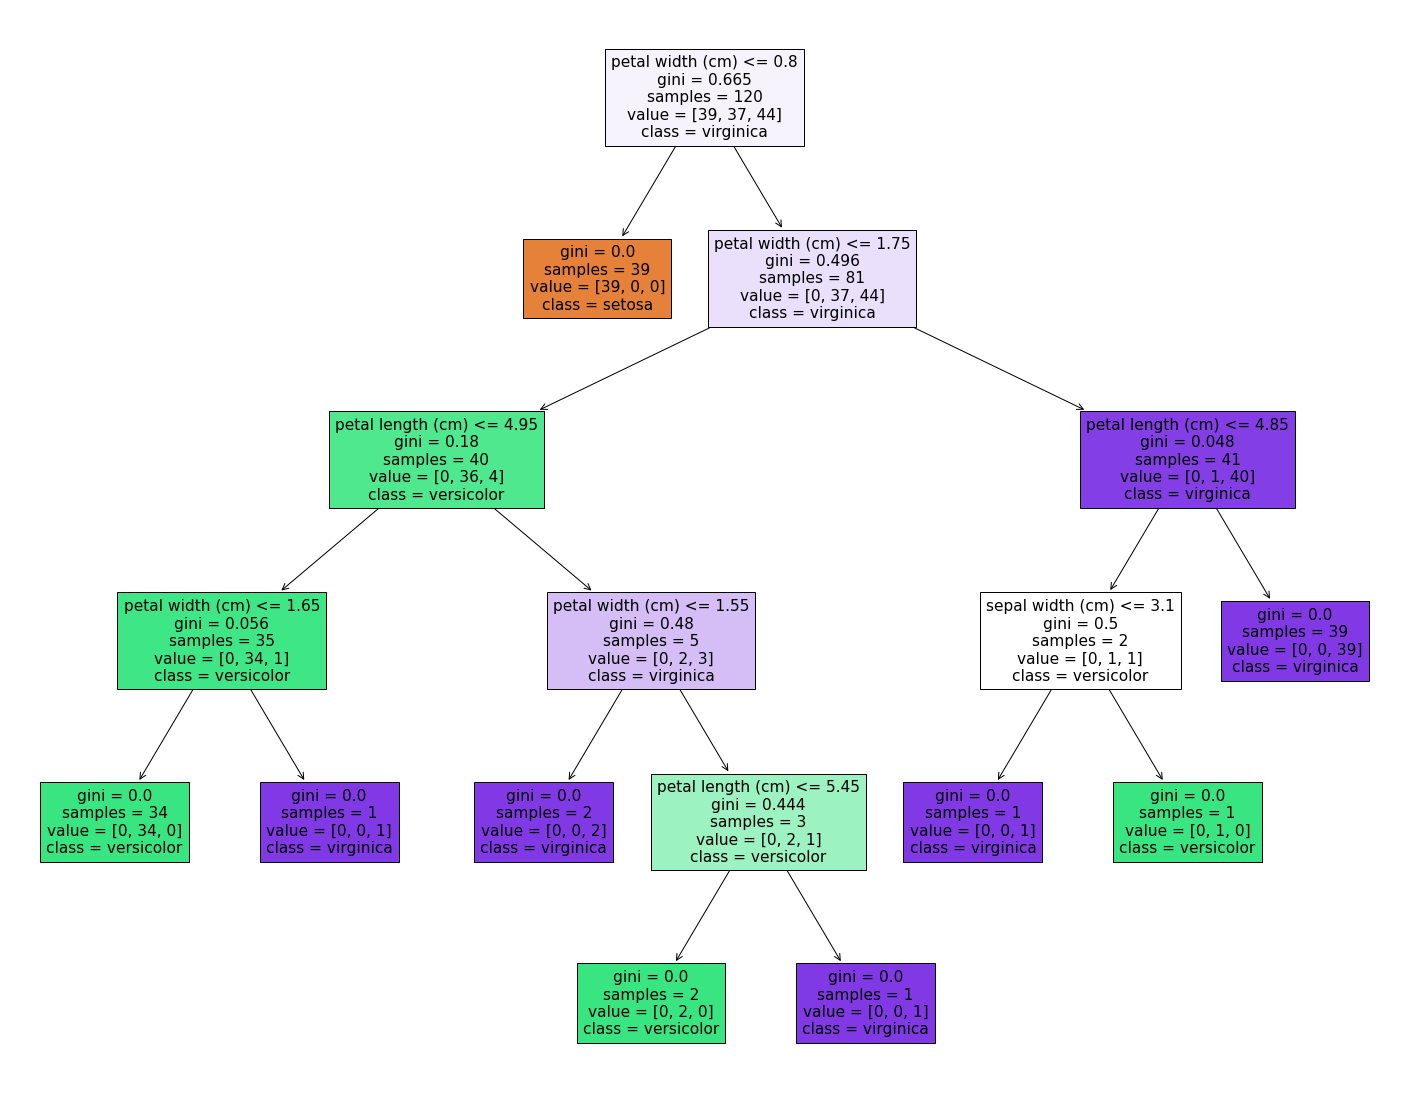

In [50]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtc, 
               feature_names=iris_dataset.feature_names,  
               class_names=iris_dataset.target_names,
               filled=True)

- we can see that Setosa Iris type, can be easily separated from other types by using only one feature
- separating 2 other classes is not that obvious, which can be observed on the Dashboard scatter plots:  
![](./pic/1.png)